# Hybrid Ensemble Method in Bangla Bully Detection 

## Importing Libraries

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
#from imblearn.over_sampling import SMOTE  # imblearn library can be installed using pip install imblearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

## Importing dataset, Performing primary analysis and pre-processing

In [2]:
data=pd.read_excel('Bangla Dataset.xlsx')
pd.set_option('display.max_colwidth', 50)
data['length']=data['comment'].apply(len)
data.channel.value_counts()
data.tail(5)

,channel,video title,video Description,video ID,comment,commnet ID,Replies,Likes,Class,Gender,length
10508,NahidRains,আজহারীর যত কুকান্ড ! #NahidRains,New Channel: The NahidRains Show - https://www...,oTx0q3st1O0,সবই বুঝলাম ভাই। ধন্যবাদ এরকম একটা তথ্যবহুল ভিড...,UgypI6TGzAoog4ywMpl4AaABAg,0,0,Not bully,Male,442
10509,NahidRains,আজহারীর যত কুকান্ড ! #NahidRains,New Channel: The NahidRains Show - https://www...,oTx0q3st1O0,তারে বেসি কইরা গাইল্লান 😠😠😠😠,UgwJJVtaZIeM8BLpX2J4AaABAg,0,1,Gibe,Male,28
10510,NahidRains,আজহারীর যত কুকান্ড ! #NahidRains,New Channel: The NahidRains Show - https://www...,oTx0q3st1O0,মজা পাইলাম,Ugy4TJSVFaFA9n84_sd4AaABAg,0,0,Not bully,Male,10
10511,NahidRains,আজহারীর যত কুকান্ড ! #NahidRains,New Channel: The NahidRains Show - https://www...,oTx0q3st1O0,ধরে নিলাম গাড়িটি মিজানুর রহমান আজহারীর। \nএবং ...,UgyJ9GaSLIpV5Kmyh4x4AaABAg,0,0,Religious,Male,2879
10512,NahidRains,আজহারীর যত কুকান্ড ! #NahidRains,New Channel: The NahidRains Show - https://www...,oTx0q3st1O0,এজন্যই বলা হয়ে থাকে অল্প বিদ্যা ভয়ংকর। ইসলামী ...,Ugzz54dBRLExKhIOZvt4AaABAg,0,0,Religious,Male,701


In [3]:
data = data.drop(["channel", "video title", "video Description", "video ID", "commnet ID", "Replies", "Likes", "length"], axis=1)

In [4]:
print(data.head())
print(data.shape)
print(data.info())
print(data.describe())

                                             comment      Class  Gender
0  বাংলাদেশের পচা মাল ভারতে রপ্তানি করে বাংলাদেশ ...       Gibe  Female
1       তোর মত বেশ‍্যা কে ত‍্যাগ করে ভাল আছে তাহসান।     Sexual  Female
2  ভারতকে এই প্রথম কোনকিছু দিয়ে ঠকাতে  পারল বাংলা...  Triggered  Female
3  মিথিলা বলে সৃজিত নাকি ওর বাবা তাহলে বাবা আর মে...       Gibe  Female
4  তাহসানের উচিত তার মেয়ে কে এদের সাথে মিশতে না দ...  Triggered  Female
(10513, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10513 entries, 0 to 10512
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  10513 non-null  object
 1   Class    10512 non-null  object
 2   Gender   10513 non-null  object
dtypes: object(3)
memory usage: 246.5+ KB
None
       comment      Class Gender
count    10513      10512  10513
unique   10409          5      4
top      ফালতু  Not bully   Male
freq         9       4197   6690


In [5]:
import re
import string 
def remove_foreignWord(string):
    No_ForeignWord = "".join([i for i in string if i in [".","।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32])
    return No_ForeignWord

data['comment'] = data['comment'].apply(lambda string: remove_foreignWord(string))
data['comment'].head()

0    বাংলাদেশের পচা মাল ভারতে রপ্তানি করে বাংলাদেশ ...
1           তোর মত বেশ্যা কে ত্যাগ করে ভাল আছে তাহসান।
2    ভারতকে এই প্রথম কোনকিছু দিয়ে ঠকাতে  পারল বাংলা...
3    মিথিলা বলে সৃজিত নাকি ওর বাবা তাহলে বাবা আর মে...
4    তাহসানের উচিত তার মেয়ে কে এদের সাথে মিশতে না দ...
Name: comment, dtype: object

In [6]:
import string 
string.punctuation
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct
data['comment'] = data['comment'].apply(lambda txt: remove_punctuation(txt))
data.head()

,comment,Class,Gender
0,বাংলাদেশের পচা মাল ভারতে রপ্তানি করে বাংলাদেশ ...,Gibe,Female
1,তোর মত বেশ্যা কে ত্যাগ করে ভাল আছে তাহসান।,Sexual,Female
2,ভারতকে এই প্রথম কোনকিছু দিয়ে ঠকাতে পারল বাংলা...,Triggered,Female
3,মিথিলা বলে সৃজিত নাকি ওর বাবা তাহলে বাবা আর মে...,Gibe,Female
4,তাহসানের উচিত তার মেয়ে কে এদের সাথে মিশতে না দ...,Triggered,Female


In [7]:
import re
import string 
def remove_foreignWord(string):
    No_ForeignWord = "".join([i for i in string if i in [".","।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32])
    return No_ForeignWord

data['comment'] = data['comment'].apply(lambda string: remove_foreignWord(string))
data['comment'].head()

0    বাংলাদেশের পচা মাল ভারতে রপ্তানি করে বাংলাদেশ ...
1           তোর মত বেশ্যা কে ত্যাগ করে ভাল আছে তাহসান।
2    ভারতকে এই প্রথম কোনকিছু দিয়ে ঠকাতে  পারল বাংলা...
3    মিথিলা বলে সৃজিত নাকি ওর বাবা তাহলে বাবা আর মে...
4    তাহসানের উচিত তার মেয়ে কে এদের সাথে মিশতে না দ...
Name: comment, dtype: object

In [8]:
data['comment'].replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
data['comment'] = data['comment'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ').str.replace('\s+', ' ').str.strip()
data.head()

C:\Users\User\AppData\Local\Temp/ipykernel_11348/4258004544.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,comment,Class,Gender
0,বাংলাদেশের পচা মাল ভারতে রপ্তানি করে বাংলাদেশ ...,Gibe,Female
1,তোর মত বেশ্যা কে ত্যাগ করে ভাল আছে তাহসান।,Sexual,Female
2,ভারতকে এই প্রথম কোনকিছু দিয়ে ঠকাতে পারল বাংলাদেশ।,Triggered,Female
3,মিথিলা বলে সৃজিত নাকি ওর বাবা তাহলে বাবা আর মে...,Gibe,Female
4,তাহসানের উচিত তার মেয়ে কে এদের সাথে মিশতে না দ...,Triggered,Female


In [9]:
import re
def remove_URL(txt):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", txt)

def remove_html(txt):
    html = re.compile(r"<.*?>")
    return html.sub(r"", txt)

In [10]:
data['comment'] = data['comment'].apply(lambda txt: remove_html(txt))
data['comment'].replace('\n', '')
data['comment'] = data['comment'].str.replace('\n', '').str.replace('\s+', ' ').str.strip()
data.tail()

C:\Users\User\AppData\Local\Temp/ipykernel_11348/52253161.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



,comment,Class,Gender
10508,সবই বুঝলাম ভাই। ধন্যবাদ এরকম একটা তথ্যবহুল ভিড...,Not bully,Male
10509,তারে বেসি কইরা গাইল্লান,Gibe,Male
10510,মজা পাইলাম,Not bully,Male
10511,ধরে নিলাম গাড়িটি মিজানুর রহমান আজহারীর। এবং আপ...,Religious,Male
10512,এজন্যই বলা হয়ে থাকে অল্প বিদ্যা ভয়ংকর। ইসলামী ...,Religious,Male


In [1]:
def remove_emoji(string):
    emoji_pattern  = re.compile(
         "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U00002780"
        u"\U000024C2-\U0001F251"
        "]+",
        flags = re.UNICODE,
          
    )
    return emoji_pattern.sub(r"", string)
data['comment'] = data['comment'].apply(lambda string: remove_emoji(string))
data.tail()

NameError: name 'data' is not defined

In [12]:
def remove_emoji(string):
    emoji_pattern  = re.compile(
         "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U00002780"
        u"\U000024C2-\U0001F251"
        "]+",
        flags = re.UNICODE,
          
    )
    return emoji_pattern.sub(r"", string)
data['comment'] = data['comment'].apply(lambda string: remove_emoji(string))
data.tail()

,comment,Class,Gender
10508,সবই বুঝলাম ভাই। ধন্যবাদ এরকম একটা তথ্যবহুল ভিড...,Not bully,Male
10509,তারে বেসি কইরা গাইল্লান,Gibe,Male
10510,মজা পাইলাম,Not bully,Male
10511,ধরে নিলাম গাড়িটি মিজানুর রহমান আজহারীর। এবং আপ...,Religious,Male
10512,এজন্যই বলা হয়ে থাকে অল্প বিদ্যা ভয়ংকর। ইসলামী ...,Religious,Male


<AxesSubplot:>

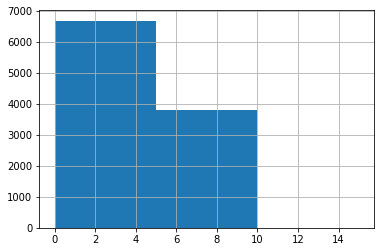

In [13]:
lens = data.Gender.str.len()
lens.hist(bins = np.arange(0,20,5))

In [14]:
data.loc[:,'Gender'] = data.Class.map({'Male':0, 'Female':1})#labeling
data['Gender'] = data['Gender'].fillna(0).astype(int)


data.loc[:,'Class'] = data.Class.map({'Not bully':0, 'Gibe':1, 'Religious':1, 'Triggered':1,'Sexual':1})#labeling
data['Class'] = data['Class'].fillna(0).astype(int)

print(data.shape)
print(data.dtypes)
data.tail()

(10513, 3)
comment    object
Class       int32
Gender      int32
dtype: object


,comment,Class,Gender
10508,সবই বুঝলাম ভাই। ধন্যবাদ এরকম একটা তথ্যবহুল ভিড...,0,0
10509,তারে বেসি কইরা গাইল্লান,1,0
10510,মজা পাইলাম,0,0
10511,ধরে নিলাম গাড়িটি মিজানুর রহমান আজহারীর। এবং আপ...,1,0
10512,এজন্যই বলা হয়ে থাকে অল্প বিদ্যা ভয়ংকর। ইসলামী ...,1,0


## Applying Feature Extraction and splitting dataset

In [15]:
from sklearn.model_selection import train_test_split

model = data['comment'].values
Class = data['Class'].values
model_train, model_test, class_train, class_test = train_test_split(
    model, Class, test_size=0.20, random_state=20000)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
df_tfidf_vect = vectorizer.fit_transform(model_train)

In [17]:
Final_train = vectorizer.fit_transform(model_train)
Final_test  = vectorizer.fit_transform(model_test)
Final_train 

<8410x2831 sparse matrix of type '<class 'numpy.float64'>'
	with 52238 stored elements in Compressed Sparse Row format>

In [18]:
Final_train.shape

(8410, 2831)

In [19]:
Final_test.shape

(2103, 1338)

## Making Pipleline for maximum iteration

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(solver = 'lbfgs', max_iter = 10000))
pipe.fit(Final_train, class_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),('logisticregression', LogisticRegression(solver = 'lbfgs', max_iter = 10000))])
pipe.score(Final_train, class_train)

0.8331747919143876

## Introducing Hybrid Method

In [21]:
estimators = []

In [22]:
model11 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic1', model11))
model12 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic2', model12))
model13 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic3', model13))
model14 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic4', model14))
model15 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic5', model15))

In [23]:
model16 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
estimators.append(('knn1', model16))
model17 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
estimators.append(('knn2', model17))
model18 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
estimators.append(('knn3', model18))
model19 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
estimators.append(('knn4', model19))
model20 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
estimators.append(('knn5', model20))

In [24]:
model21 = SVC(kernel = 'linear')
estimators.append(('svm1', model21))
model22 = SVC(kernel = 'poly')
estimators.append(('svm2', model22))
model23 = SVC(kernel = 'rbf')
estimators.append(('svm3', model23))
model24 = SVC(kernel = 'rbf')
estimators.append(('svm4', model24))
model25 = SVC(kernel = 'linear')
estimators.append(('svm5', model25))

In [25]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators)

In [26]:
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
results = model_selection.cross_val_score(ensemble, Final_train, class_train, cv=kfold)

In [27]:
ensemble.fit(Final_train, class_train)
print(ensemble.score(Final_train, class_train))

0.8376932223543401


In [28]:
y_pred = ensemble.predict(Final_train)
cm_HybridEnsembler = confusion_matrix(class_train, y_pred)
cm_HybridEnsembler

array([[2351, 1013],
       [ 352, 4694]], dtype=int64)

## Accuracy using Hybrid Ensemble method

In [29]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
results = model_selection.cross_val_score(ensemble, Final_test, class_test, cv=kfold)

In [30]:
ensemble.fit(Final_test, class_test)
print(ensemble.score(Final_test, class_test))

0.8487874465049928


In [31]:
y_pred = ensemble.predict(Final_test)

cm_HybridEnsembler = confusion_matrix(class_test, y_pred)
cm_HybridEnsembler

array([[ 569,  265],
       [  53, 1216]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(class_test, y_pred)))
print('Precision score: {}'.format(precision_score(class_test, y_pred)))
print('Recall score: {}'.format(recall_score(class_test, y_pred)))
print('F1 score: {}'.format(f1_score(class_test, y_pred)))
print("Confusion matrix:", cm_HybridEnsembler)

Accuracy score: 0.8487874465049928
Precision score: 0.8210668467251857
Recall score: 0.9582348305752562
F1 score: 0.8843636363636365
Confusion matrix: [[ 569  265]
 [  53 1216]]
